In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic+gamma+telescope/magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df["class"] = (df["class"]=="g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

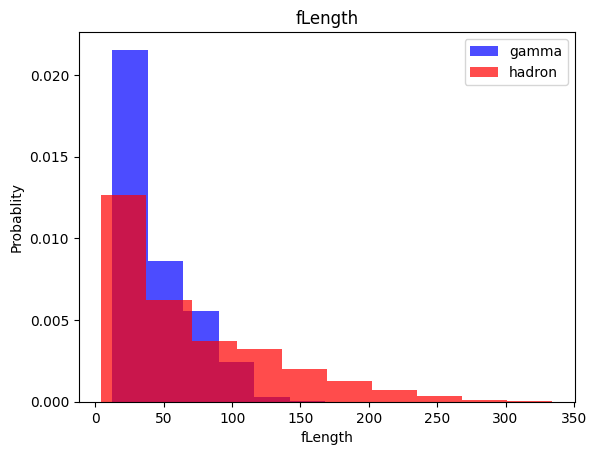

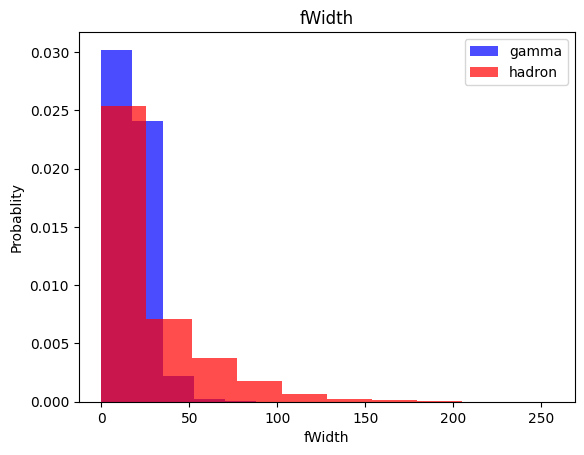

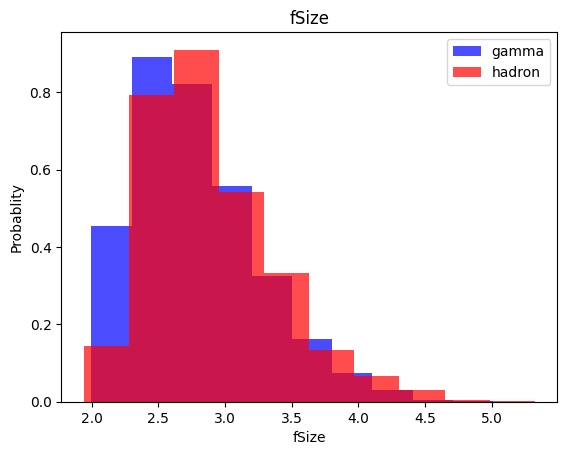

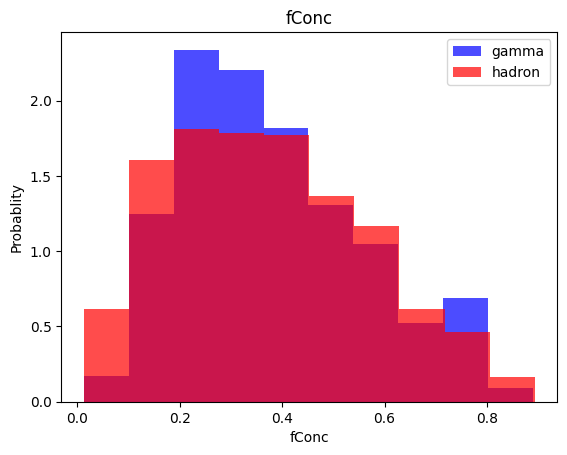

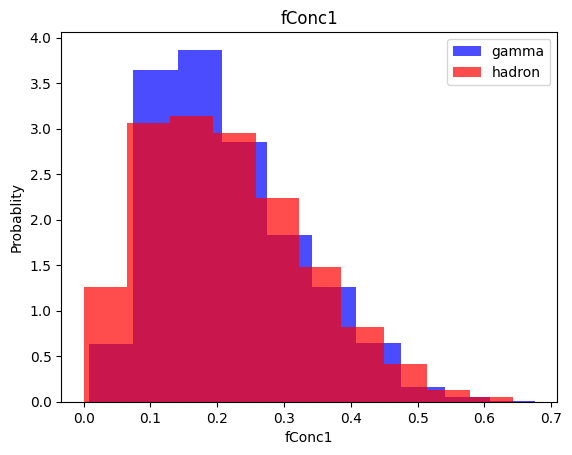

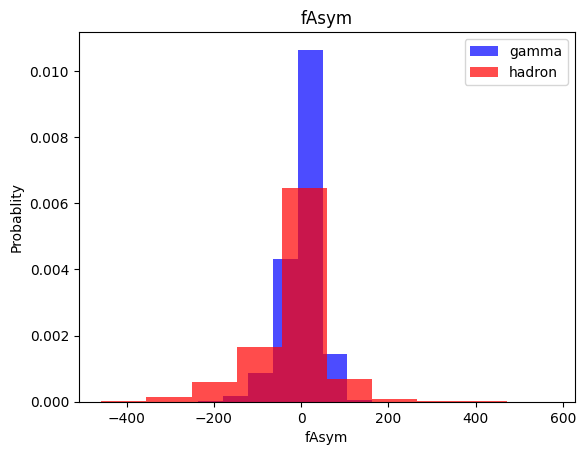

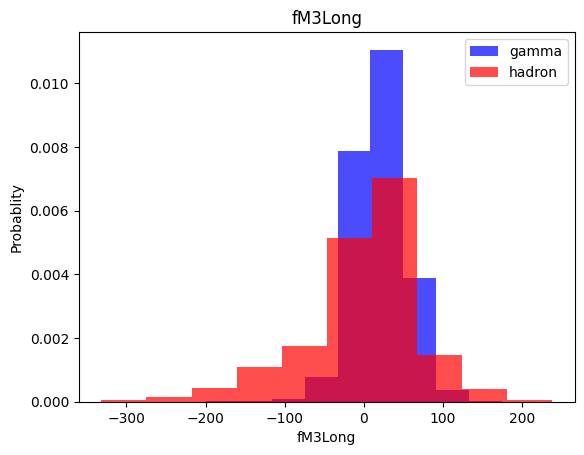

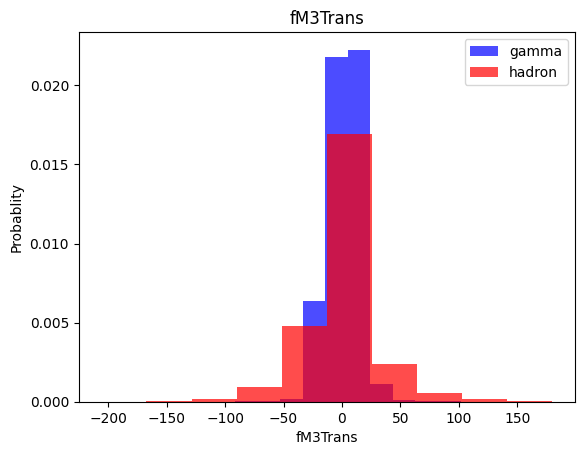

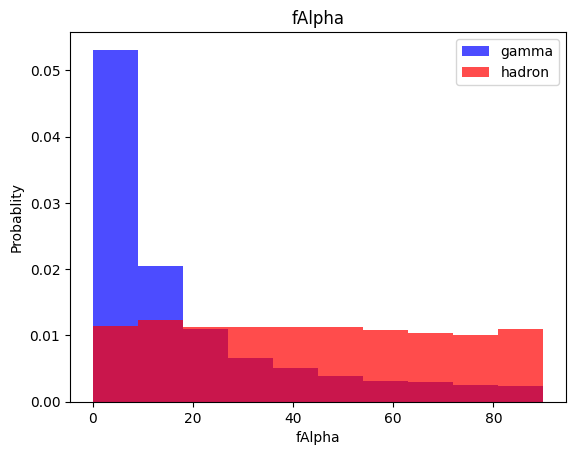

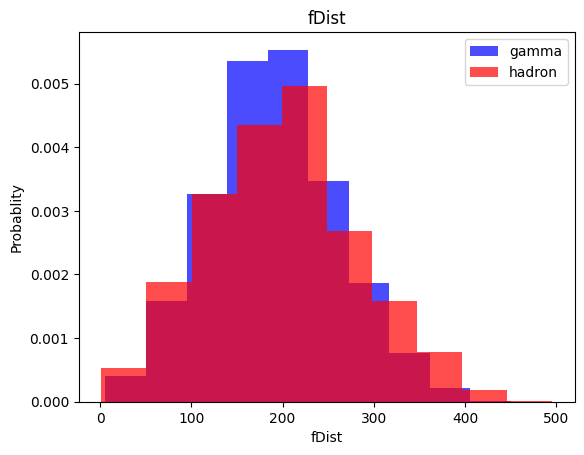

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probablity")
    plt.legend()
    plt.show()

# Train, validation, test datasets

In [67]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [68]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y , (-1, 1))))
    
    return data, X, y

In [69]:
print(len(train[train["class"]==0])) #hadron
print(len(train[train["class"]==1])) #gamma

4013
7399


In [70]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [71]:
len(y_train)

14798

In [72]:
sum(y_train==1)

7399

In [73]:
print(len(train[train["class"]==0])) #hadron
print(len(train[train["class"]==1])) #gamma

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [74]:
sum(y_train==0)

7399

In [75]:
sum(y_train==1)

7399

# kNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [77]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred = knn_model.predict(X_test)

In [79]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [80]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1323
           1       0.85      0.85      0.85      2481

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [84]:
y_pred = nb_model.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1323
           1       0.74      0.90      0.81      2481

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Log Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lh_model = LogisticRegression()
lg_model = lo_model.fit(X_train, y_train)

In [88]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1323
           1       0.85      0.83      0.84      2481

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



# SVM

In [89]:
from sklearn.svm import SVC

In [90]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [91]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1323
           1       0.89      0.89      0.89      2481

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [92]:
import tensorflow as tf

In [93]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [94]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [95]:
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

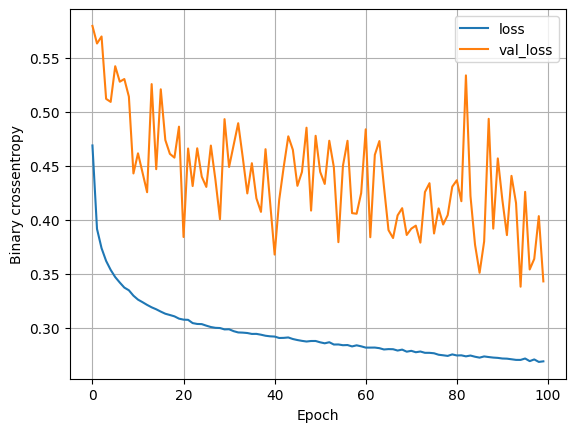

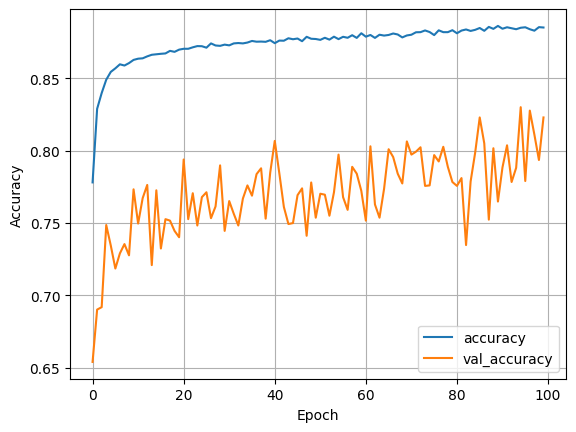

In [96]:
plot_loss(history)
plot_accuracy(history)

# Nueral Net Models comparison

In [97]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    plt.grid(True)
    
    plt.show()

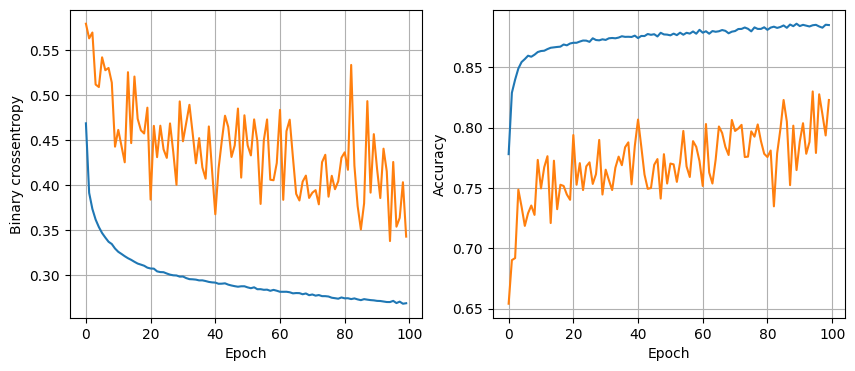

In [98]:
plot_history(history)

In [99]:
def train_model(X_train, y_train, num_units, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_units, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_units, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                loss='binary_crossentropy',
                metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    return nn_model, history

16 nodes, dropout 0.0, lr 0.01, batck_size 32


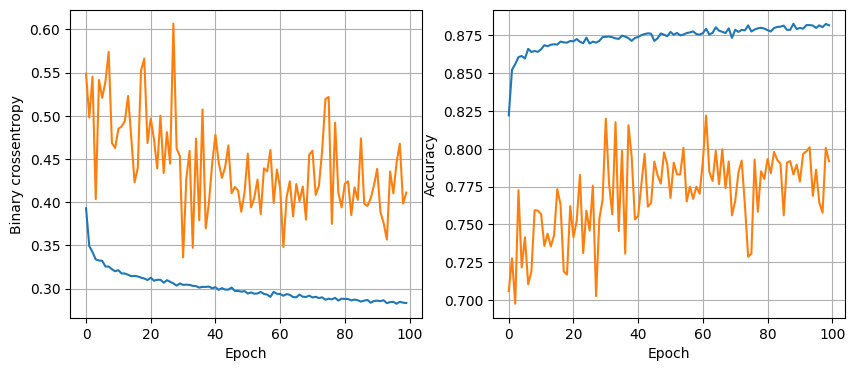

119/119 [==============================] - 0s 3ms/step - loss: 0.3019 - accuracy: 0.8796
16 nodes, dropout 0.0, lr 0.01, batck_size 64


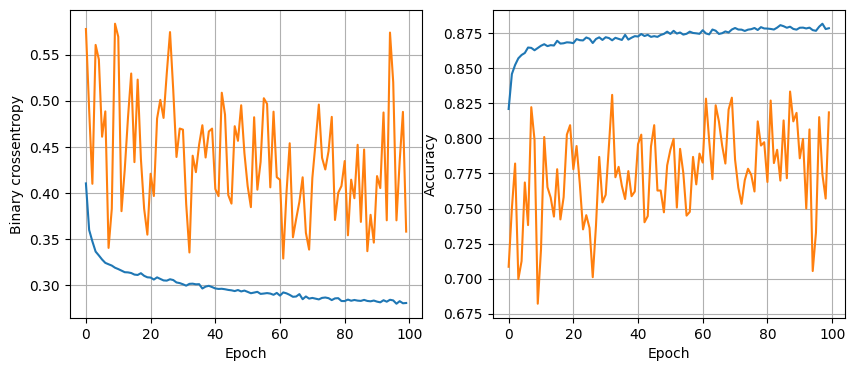

119/119 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8701
16 nodes, dropout 0.0, lr 0.01, batck_size 128


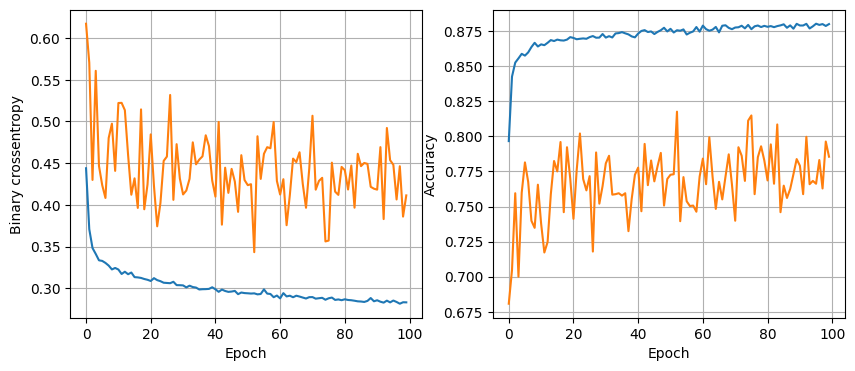

119/119 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8759
16 nodes, dropout 0.0, lr 0.005, batck_size 32


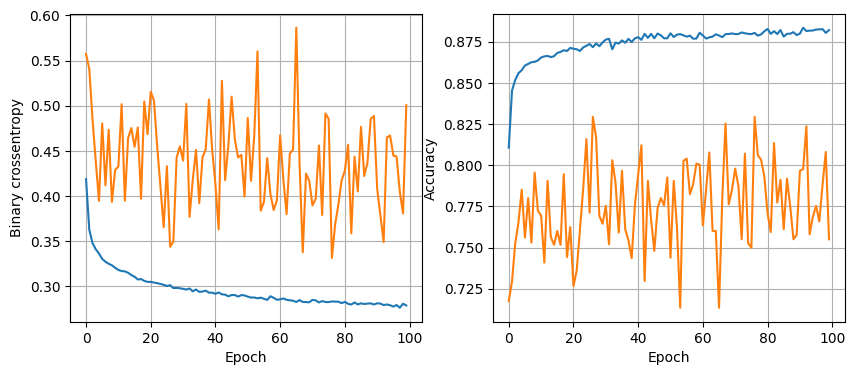

119/119 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8793
16 nodes, dropout 0.0, lr 0.005, batck_size 64


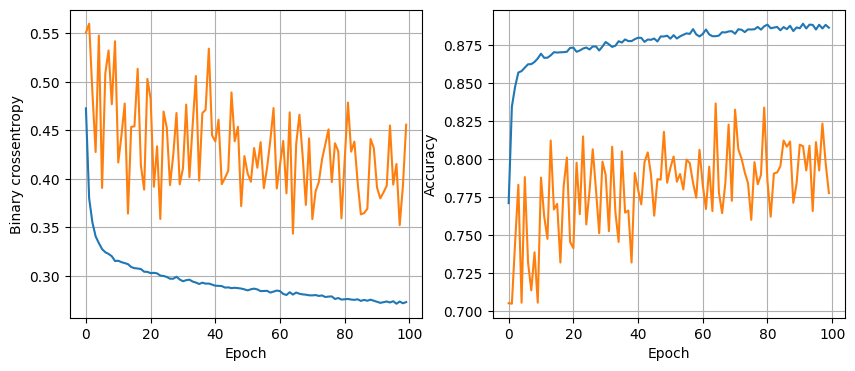

119/119 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8822
16 nodes, dropout 0.0, lr 0.005, batck_size 128


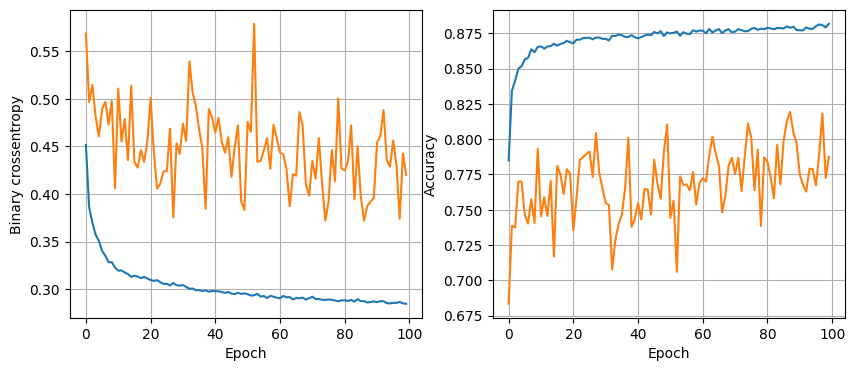

119/119 [==============================] - 0s 3ms/step - loss: 0.2974 - accuracy: 0.8743
16 nodes, dropout 0.0, lr 0.001, batck_size 32


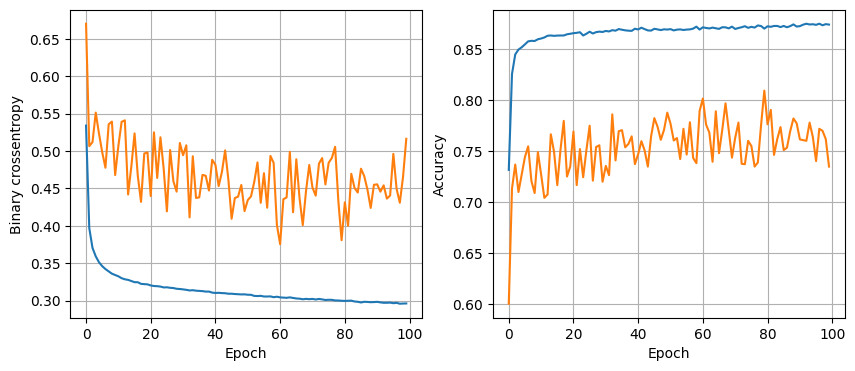

119/119 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.8767
16 nodes, dropout 0.0, lr 0.001, batck_size 64


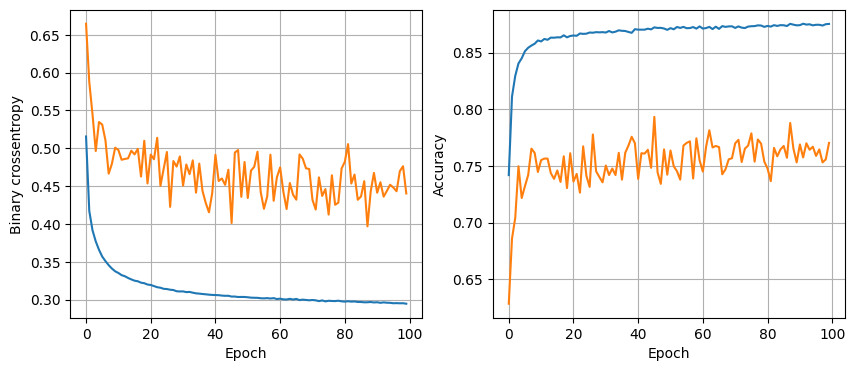

119/119 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8725
16 nodes, dropout 0.0, lr 0.001, batck_size 128


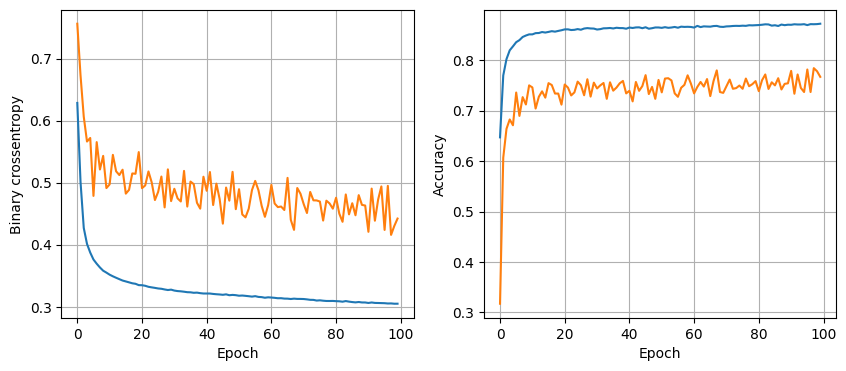

119/119 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8764
16 nodes, dropout 0.2, lr 0.01, batck_size 32


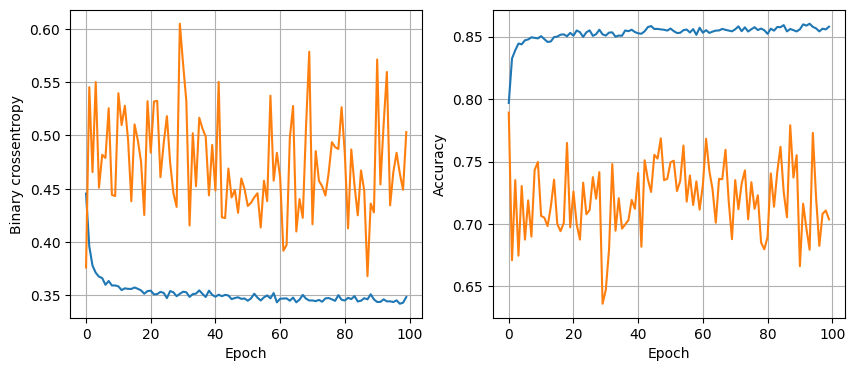

119/119 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.01, batck_size 64


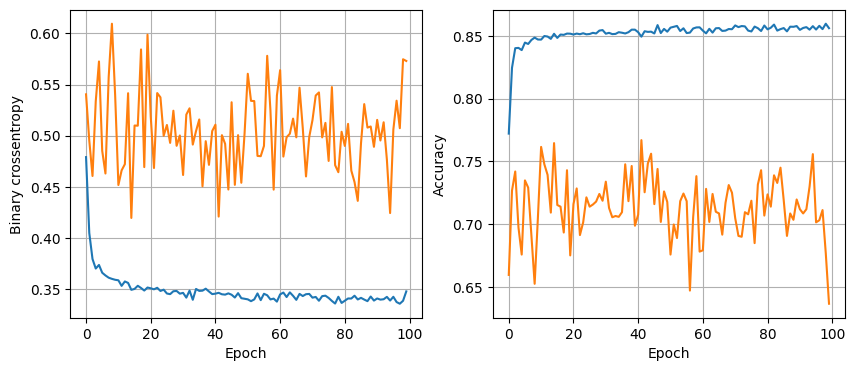

119/119 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8567
16 nodes, dropout 0.2, lr 0.01, batck_size 128


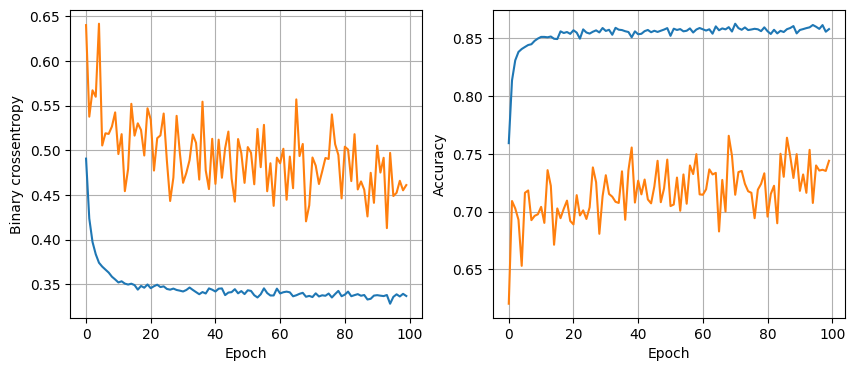

119/119 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 0.8746
16 nodes, dropout 0.2, lr 0.005, batck_size 32


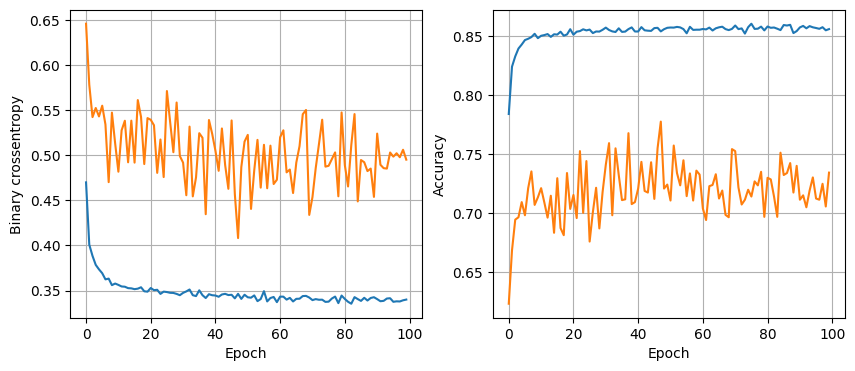

119/119 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.005, batck_size 64


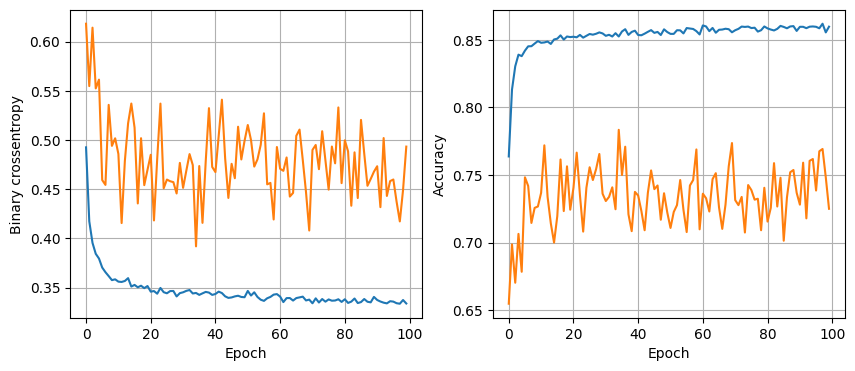

119/119 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.005, batck_size 128


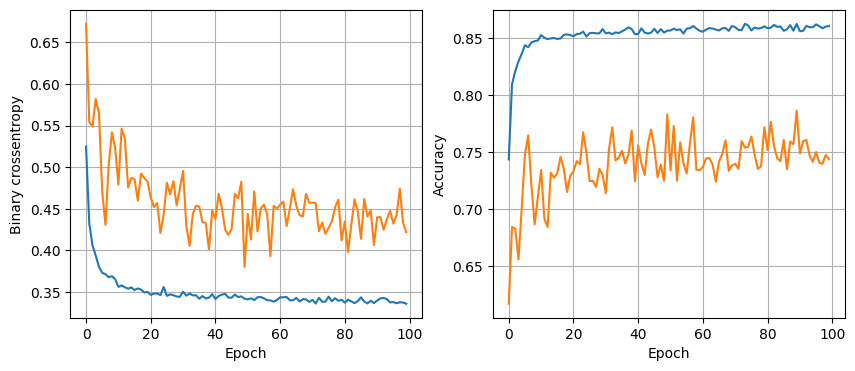

119/119 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8743
16 nodes, dropout 0.2, lr 0.001, batck_size 32


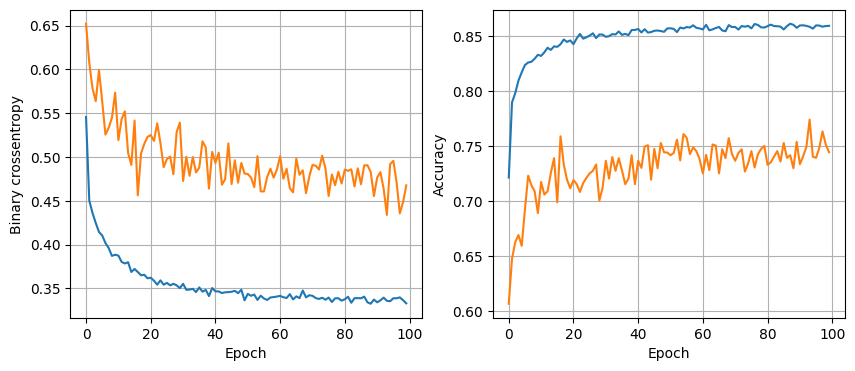

119/119 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8749
16 nodes, dropout 0.2, lr 0.001, batck_size 64


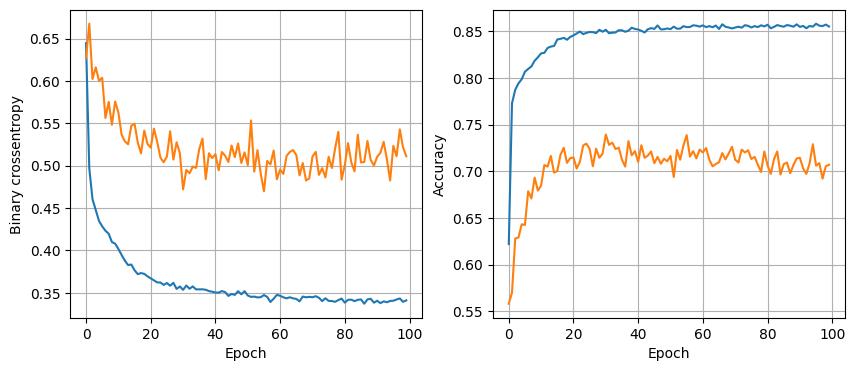

119/119 [==============================] - 0s 3ms/step - loss: 0.3086 - accuracy: 0.8738
16 nodes, dropout 0.2, lr 0.001, batck_size 128


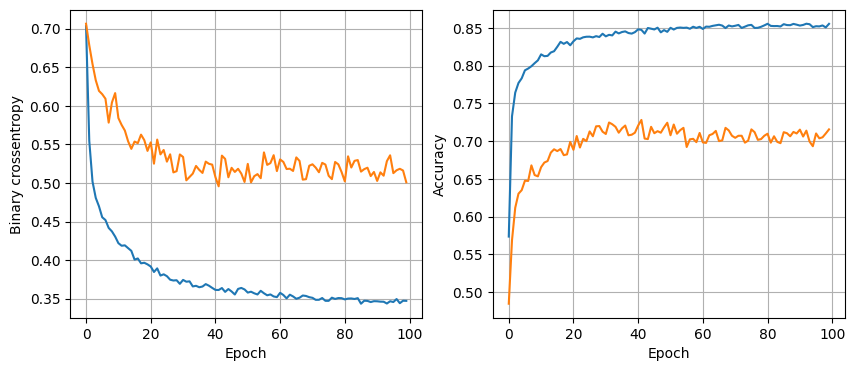

119/119 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8670
32 nodes, dropout 0.0, lr 0.01, batck_size 32


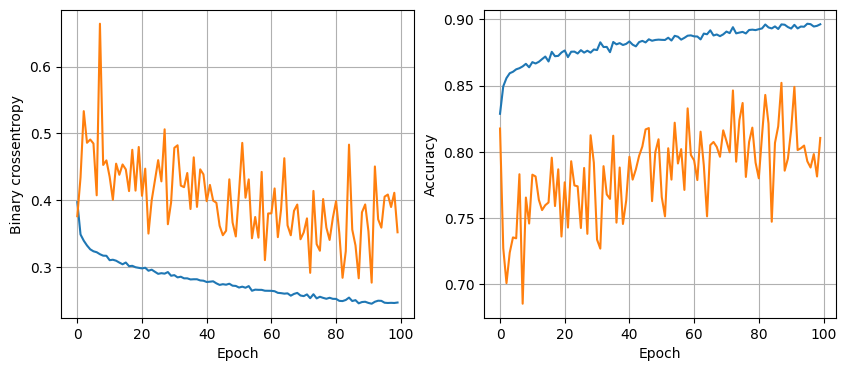

119/119 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8693
32 nodes, dropout 0.0, lr 0.01, batck_size 64


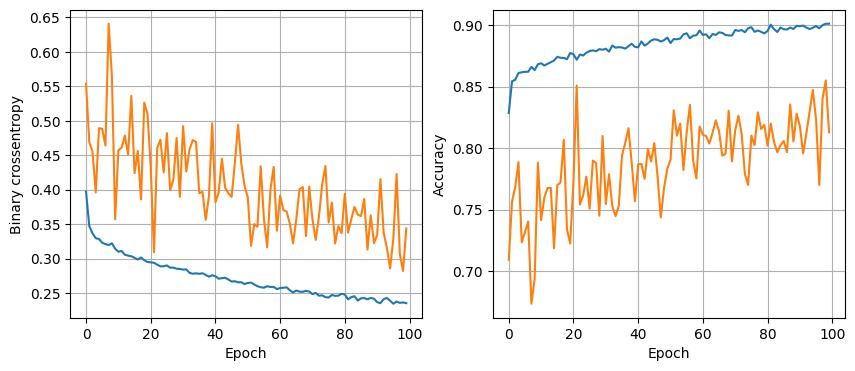

119/119 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8696
32 nodes, dropout 0.0, lr 0.01, batck_size 128


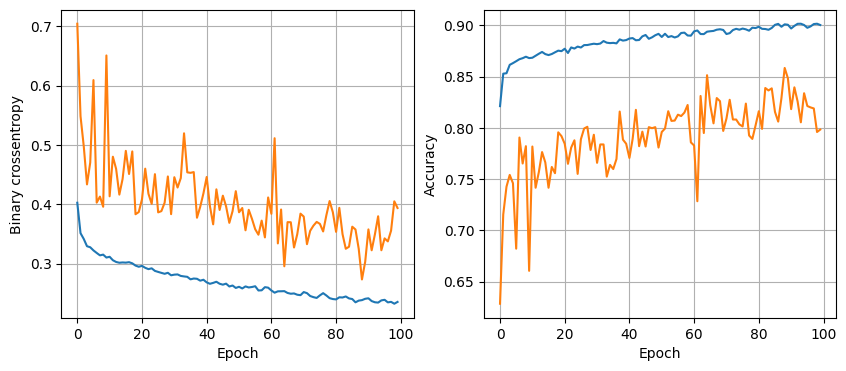

119/119 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.8633
32 nodes, dropout 0.0, lr 0.005, batck_size 32


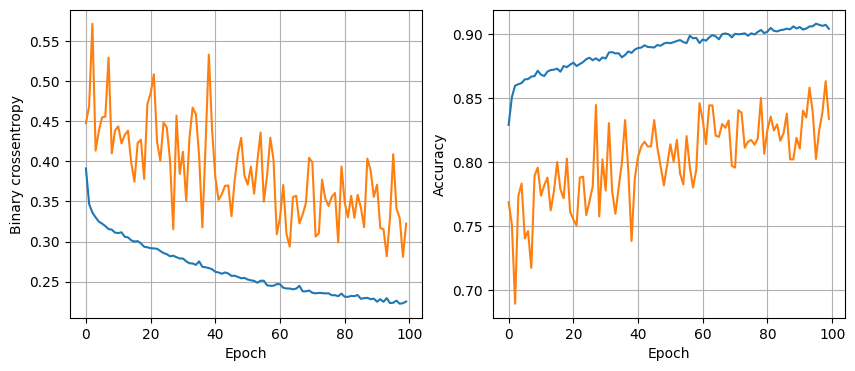

119/119 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8707
32 nodes, dropout 0.0, lr 0.005, batck_size 64


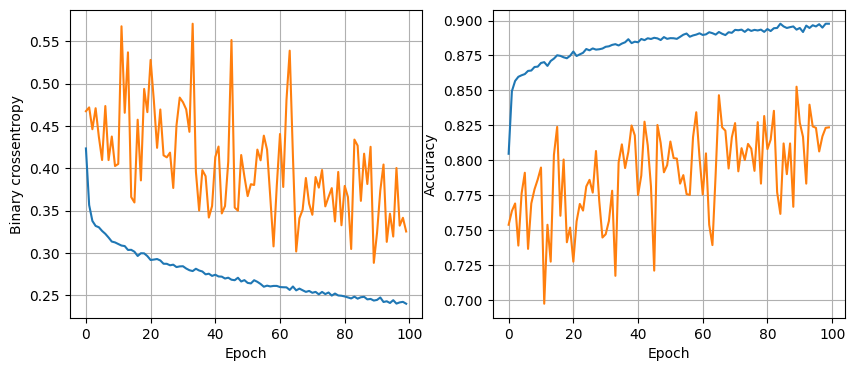

119/119 [==============================] - 0s 3ms/step - loss: 0.3327 - accuracy: 0.8659
32 nodes, dropout 0.0, lr 0.005, batck_size 128


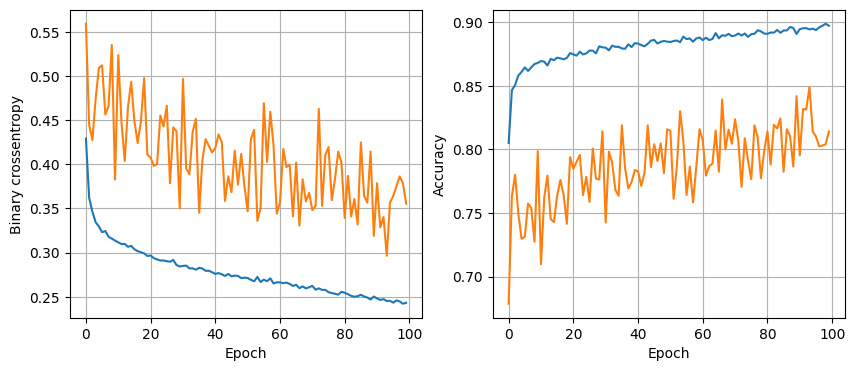

119/119 [==============================] - 0s 3ms/step - loss: 0.3226 - accuracy: 0.8828
32 nodes, dropout 0.0, lr 0.001, batck_size 32


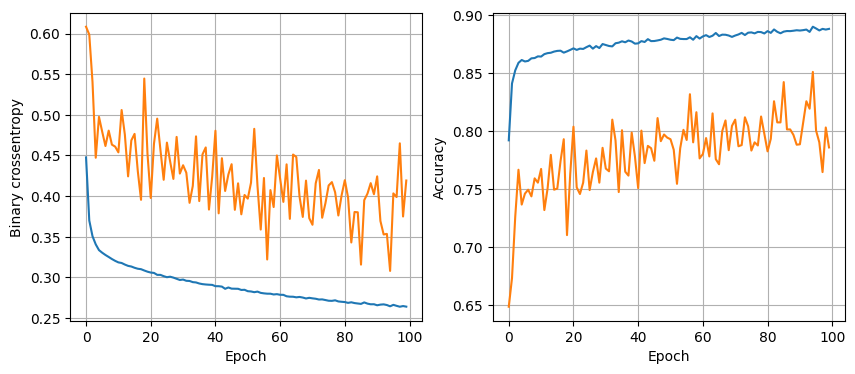

119/119 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8736
32 nodes, dropout 0.0, lr 0.001, batck_size 64


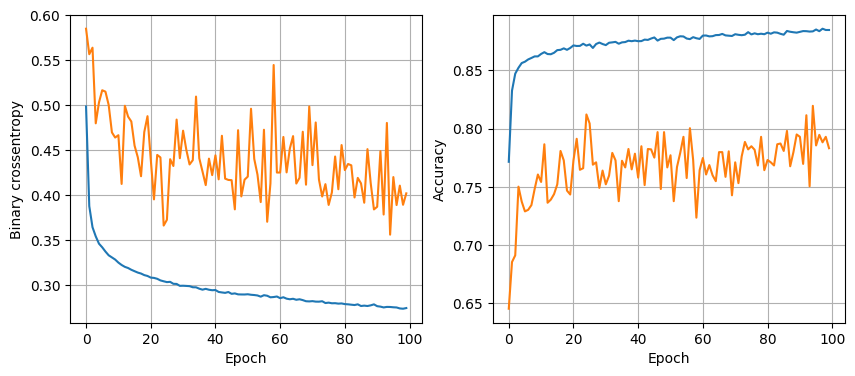

119/119 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8759
32 nodes, dropout 0.0, lr 0.001, batck_size 128


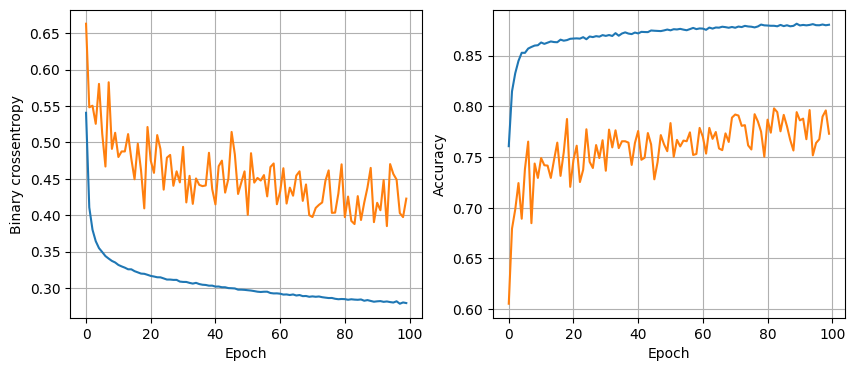

119/119 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.01, batck_size 32


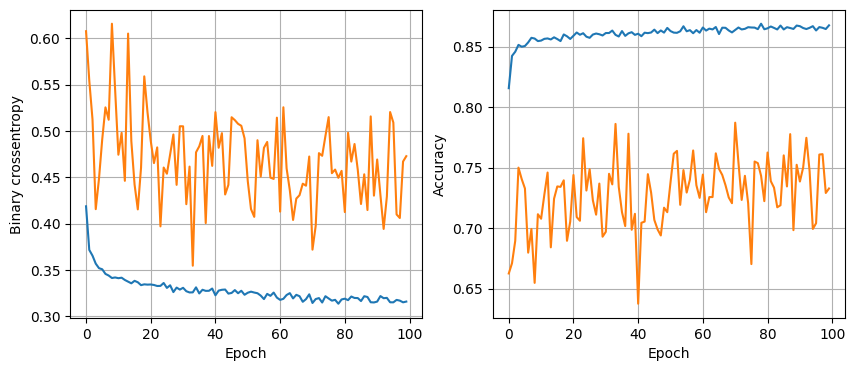

119/119 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.8772
32 nodes, dropout 0.2, lr 0.01, batck_size 64


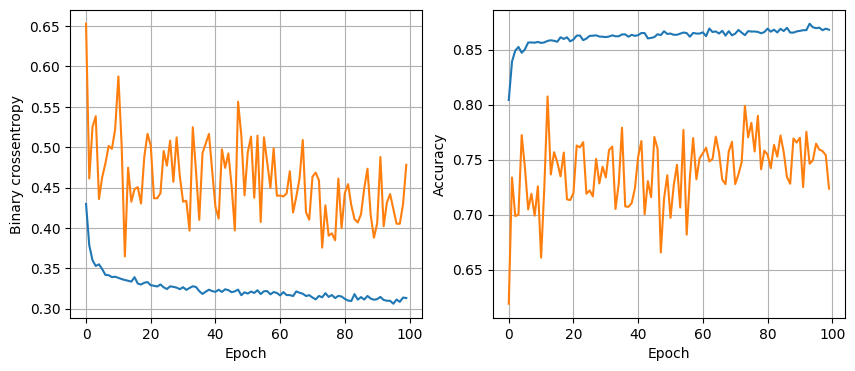

119/119 [==============================] - 0s 4ms/step - loss: 0.3025 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.01, batck_size 128


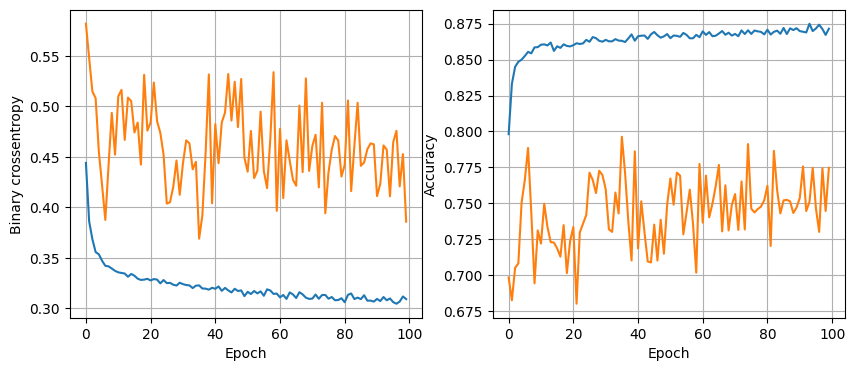

119/119 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.8807
32 nodes, dropout 0.2, lr 0.005, batck_size 32


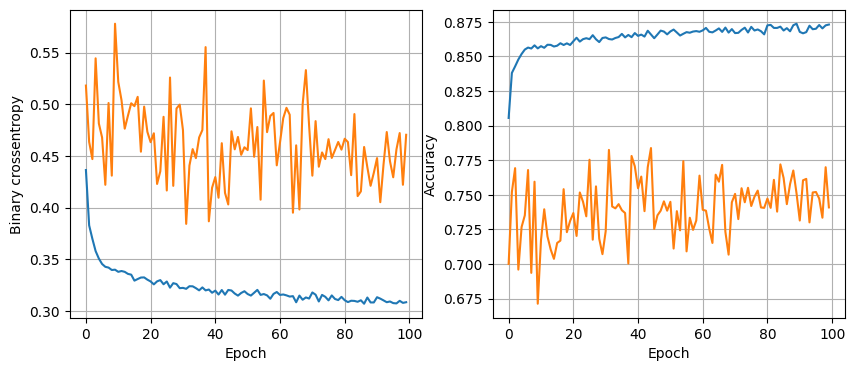

119/119 [==============================] - 0s 3ms/step - loss: 0.2887 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.005, batck_size 64


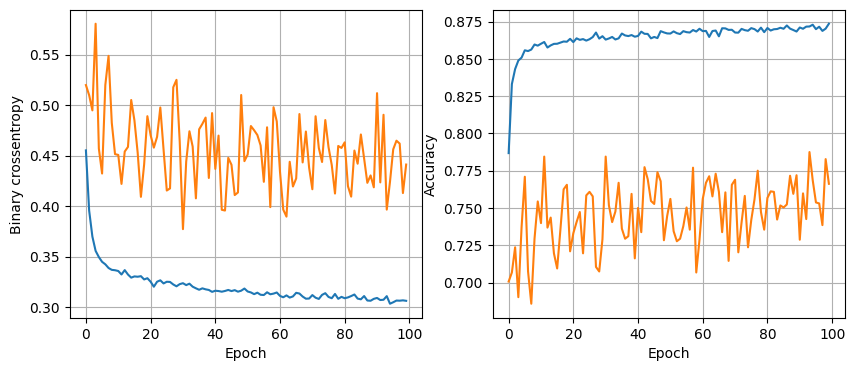

119/119 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.8849
32 nodes, dropout 0.2, lr 0.005, batck_size 128


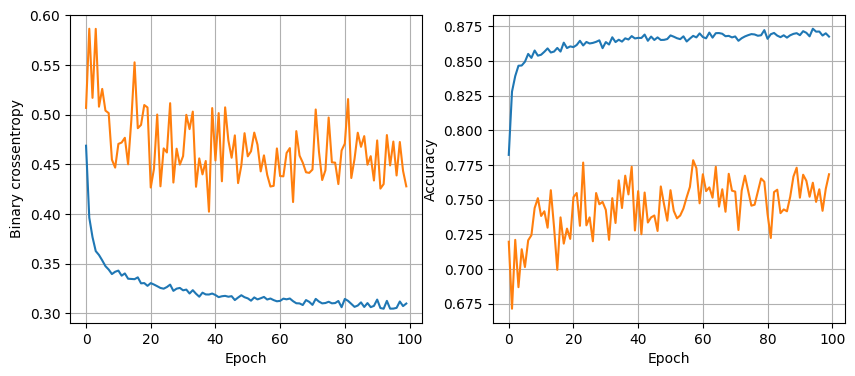

119/119 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.001, batck_size 32


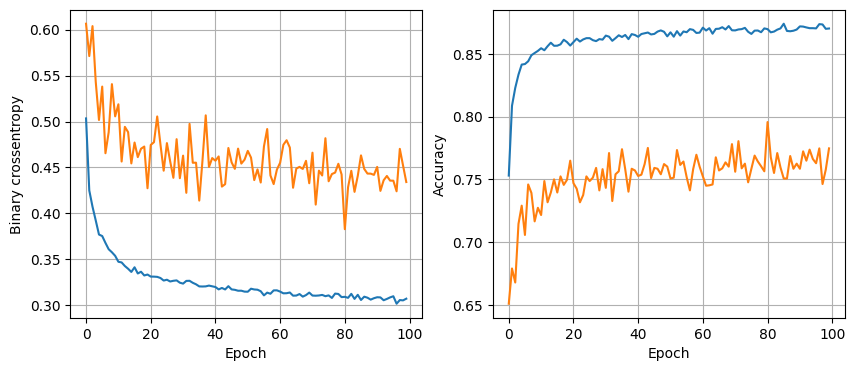

119/119 [==============================] - 1s 4ms/step - loss: 0.2878 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.001, batck_size 64


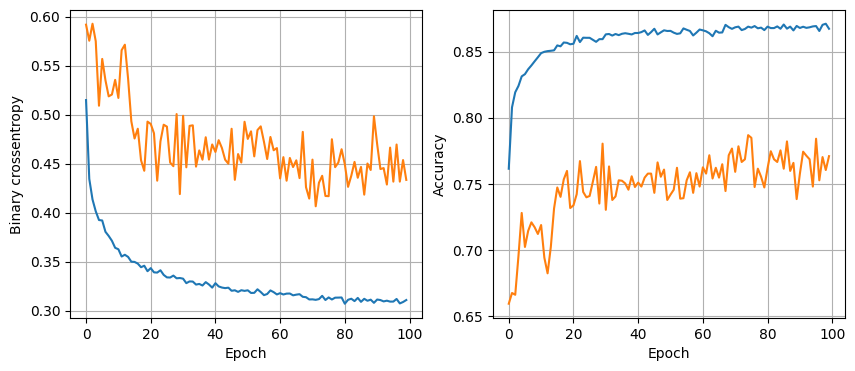

119/119 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.001, batck_size 128


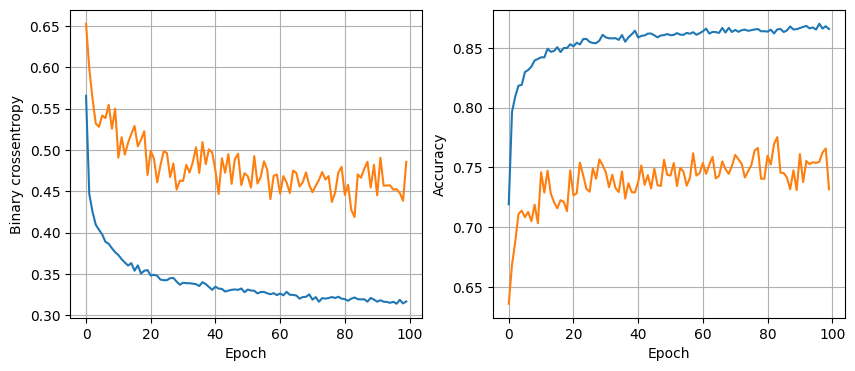

119/119 [==============================] - 0s 4ms/step - loss: 0.2951 - accuracy: 0.8770
64 nodes, dropout 0.0, lr 0.01, batck_size 32


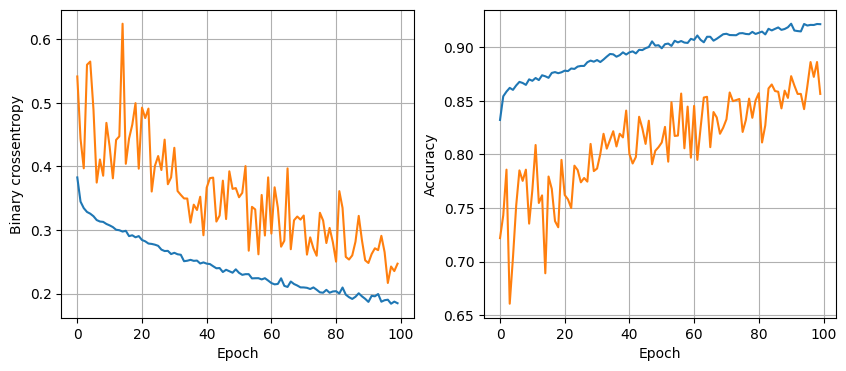

119/119 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8730
64 nodes, dropout 0.0, lr 0.01, batck_size 64


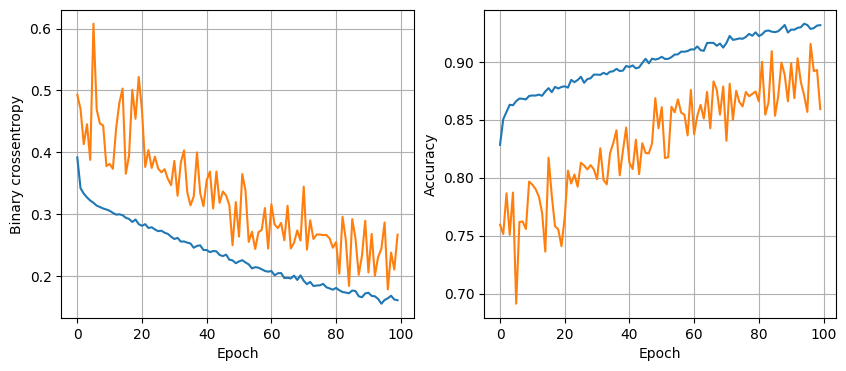

119/119 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8604
64 nodes, dropout 0.0, lr 0.01, batck_size 128


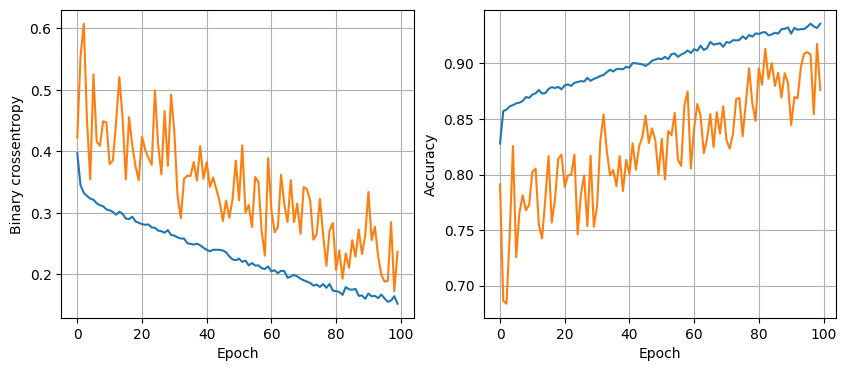

119/119 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.8578
64 nodes, dropout 0.0, lr 0.005, batck_size 32


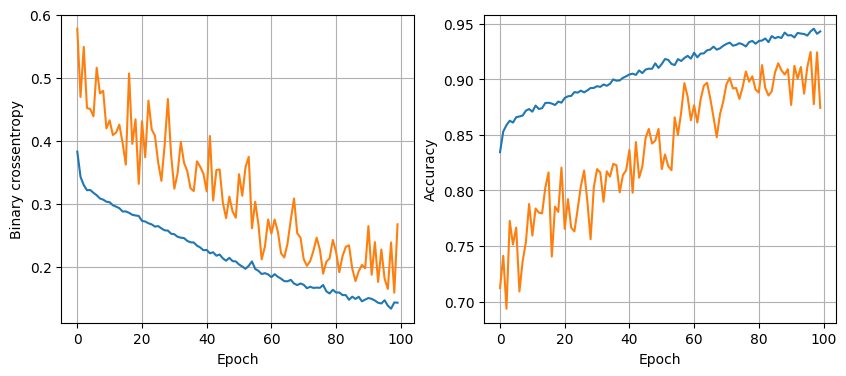

119/119 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.8541
64 nodes, dropout 0.0, lr 0.005, batck_size 64


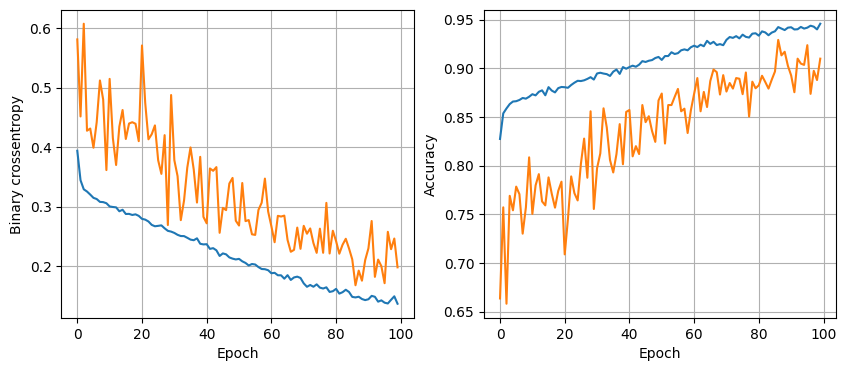

119/119 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.8591
64 nodes, dropout 0.0, lr 0.005, batck_size 128


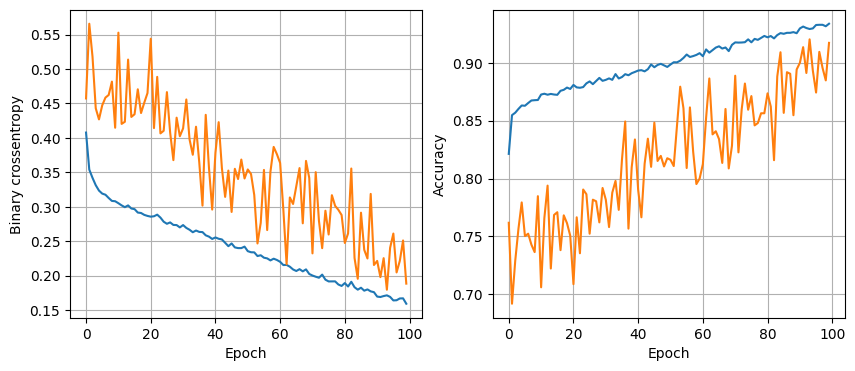

119/119 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8544
64 nodes, dropout 0.0, lr 0.001, batck_size 32


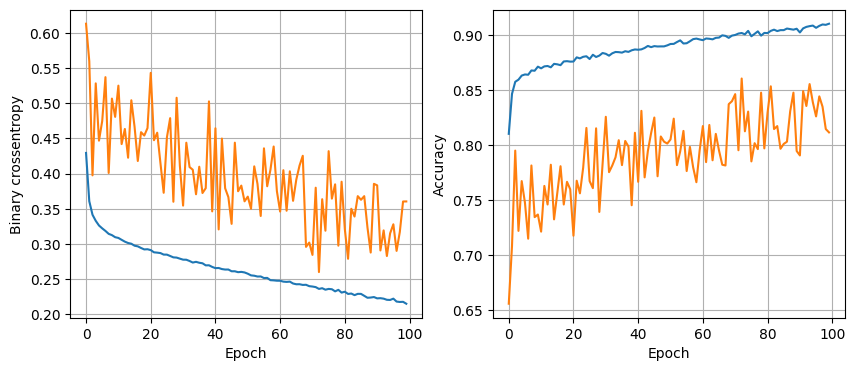

119/119 [==============================] - 1s 4ms/step - loss: 0.3296 - accuracy: 0.8722
64 nodes, dropout 0.0, lr 0.001, batck_size 64


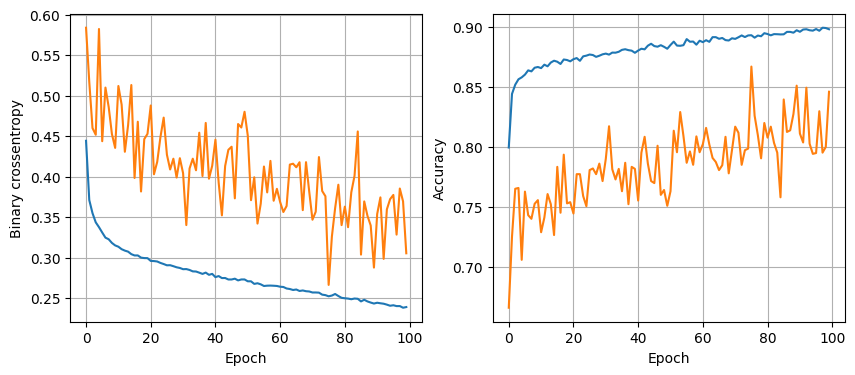

119/119 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8746
64 nodes, dropout 0.0, lr 0.001, batck_size 128


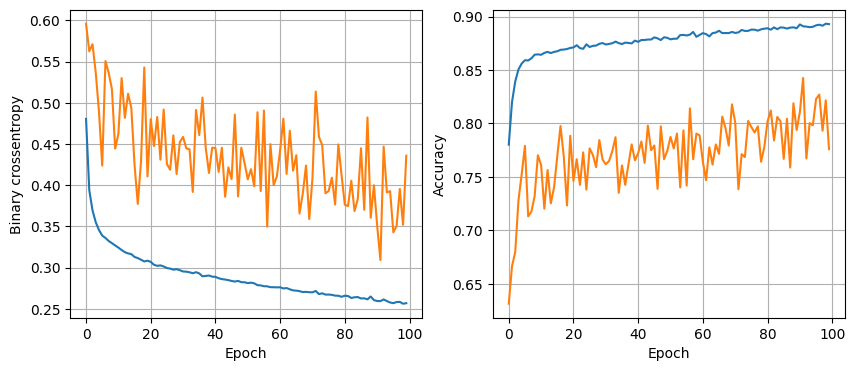

119/119 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.01, batck_size 32


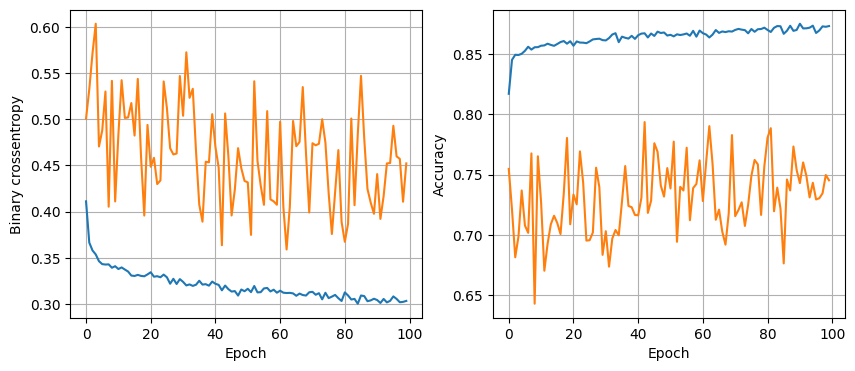

119/119 [==============================] - 0s 4ms/step - loss: 0.2915 - accuracy: 0.8822
64 nodes, dropout 0.2, lr 0.01, batck_size 64


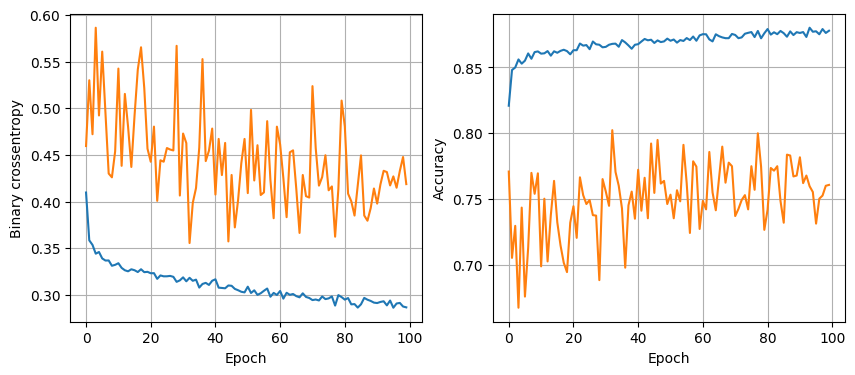

119/119 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.01, batck_size 128


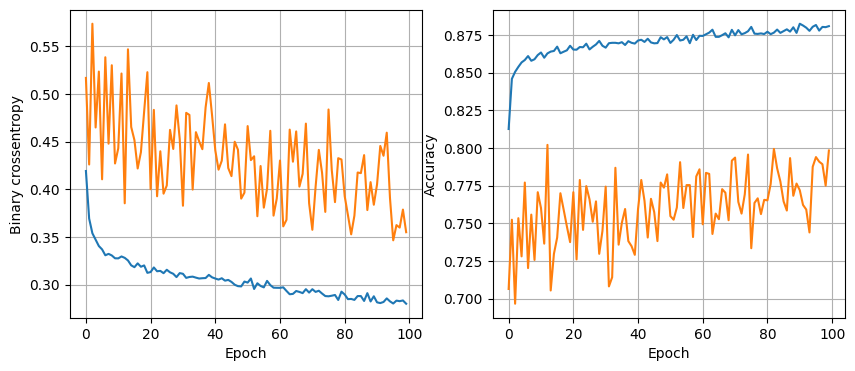

119/119 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.8809
64 nodes, dropout 0.2, lr 0.005, batck_size 32


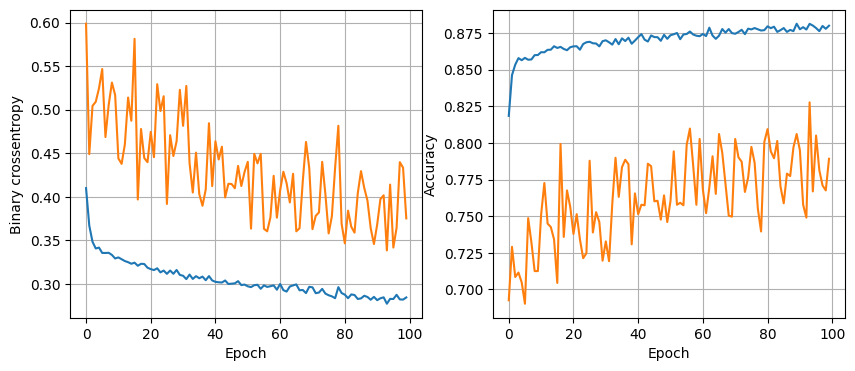

119/119 [==============================] - 0s 3ms/step - loss: 0.2869 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.005, batck_size 64


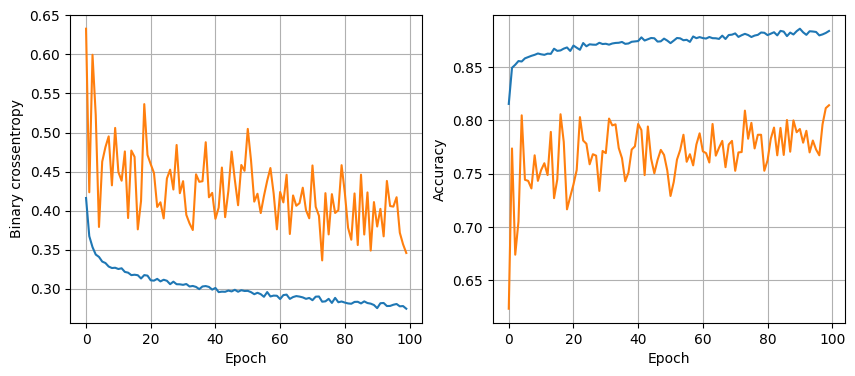

119/119 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.005, batck_size 128


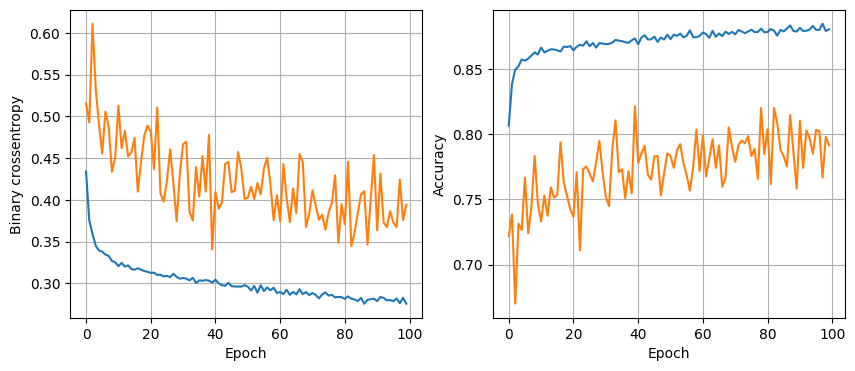

119/119 [==============================] - 1s 5ms/step - loss: 0.2801 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.001, batck_size 32


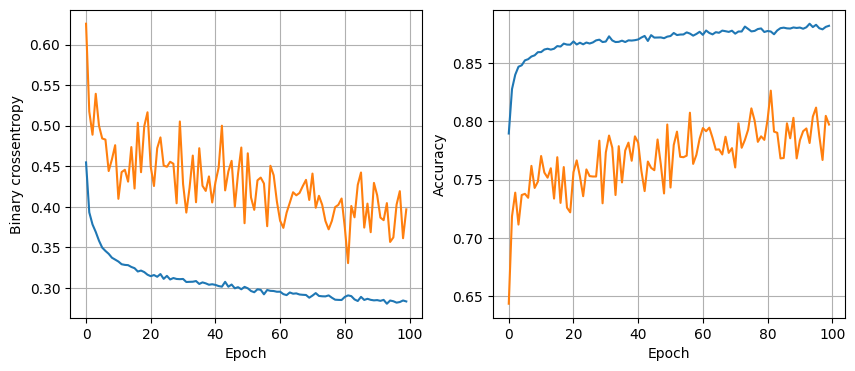

119/119 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8854
64 nodes, dropout 0.2, lr 0.001, batck_size 64


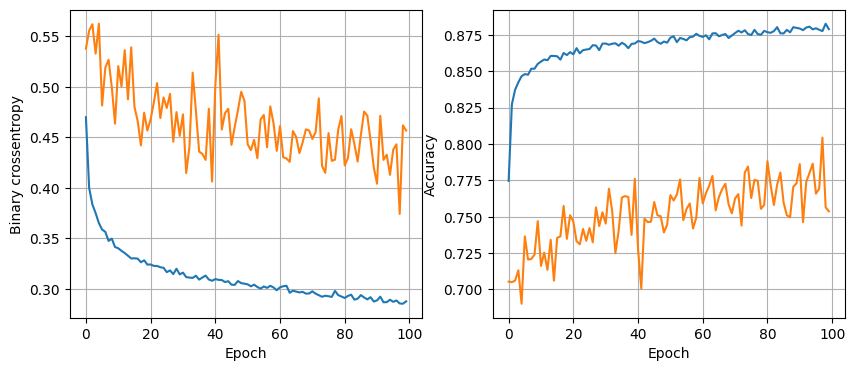

119/119 [==============================] - 0s 3ms/step - loss: 0.2825 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.001, batck_size 128


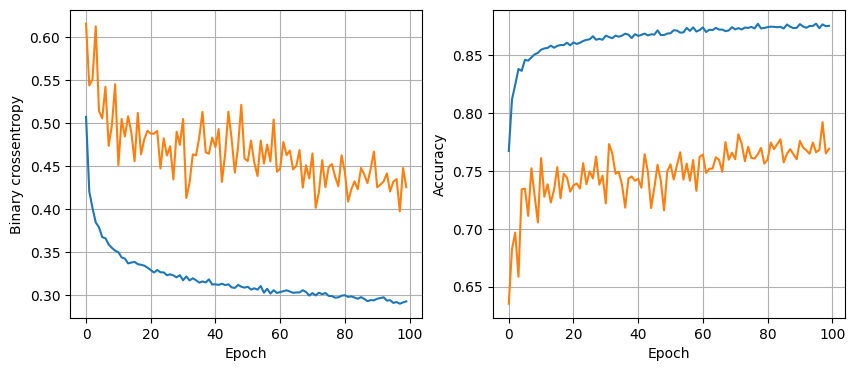

119/119 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.8835


In [101]:
least_val_loss = float('inf')
least_val_model = None
epochs=100
for num_units in [16, 32, 64]:
    for dropout_prob in [0.0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_units} nodes, dropout {dropout_prob}, lr {lr}, batck_size {batch_size}")
                model, history = train_model(X_train, y_train, num_units, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model

In [103]:
least_val_model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 64)                704       
                                                                 
 dropout_106 (Dropout)       (None, 64)                0         
                                                                 
 dense_175 (Dense)           (None, 64)                4160      
                                                                 
 dropout_107 (Dropout)       (None, 64)                0         
                                                                 
 dense_176 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [104]:
least_val_loss

0.2782047986984253

In [109]:
y_pred = least_val_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )
y_pred

119/119 [==============================] - 1s 4ms/step


array([1, 1, 1, ..., 0, 1, 1])

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1323
           1       0.88      0.94      0.91      2481

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

